In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C2.csv')
X = df[df.columns[:-1]]
Y = df[df.columns[-1]]
X.shape, Y.shape

((9578, 12), (9578,))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

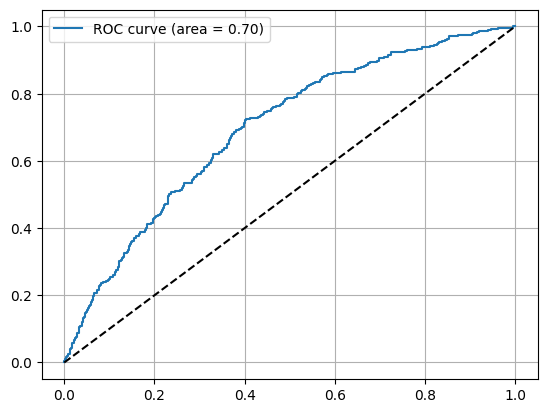

In [11]:
y_prob = model.predict_proba(x_test)[:, 1]   # probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='upper left')
plt.grid()
plt.show()